## Sample Generation with ARIMA + change point 

In [28]:
import random
import matplotlib.pyplot as plt

In [29]:
def arima(a1, a2, x0, x1, epsilon=1e-2, n_data=100): 
    ret = [x0, x1]
    for i in range(2, n_data):
        error = random.random() * epsilon
        ret.append(a1 * ret[i-1] + a2 * ret[i-2] + error)
    return ret

In [30]:
random.seed(2021)
target_len = 10_000

In [31]:
# Generate change point distances
change_point_distances = arima(0.45, 0.54, 168, 360, 10, 30)
change_point_distances = list(map(int, change_point_distances))

In [32]:
change_point_distances

[168,
 360,
 261,
 320,
 290,
 306,
 301,
 310,
 307,
 306,
 306,
 308,
 313,
 309,
 316,
 316,
 320,
 320,
 317,
 324,
 322,
 322,
 328,
 326,
 333,
 334,
 333,
 334,
 334,
 334]

In [37]:
hyper_params_pool = [
    (0.4, 0.5),
    (0.5, 0.4),
    (0.42, 0.48)
]

In [42]:
# Generate synthetic time series data with change points
arima_data = [0, 0]

for change_point_distance in change_point_distances:
    hyper_params = random.choice(hyper_params_pool)
    arima_generated_temp = arima(*hyper_params, arima_data[-2], arima_data[-1], n_data=change_point_distance)
    arima_data += arima_generated_temp

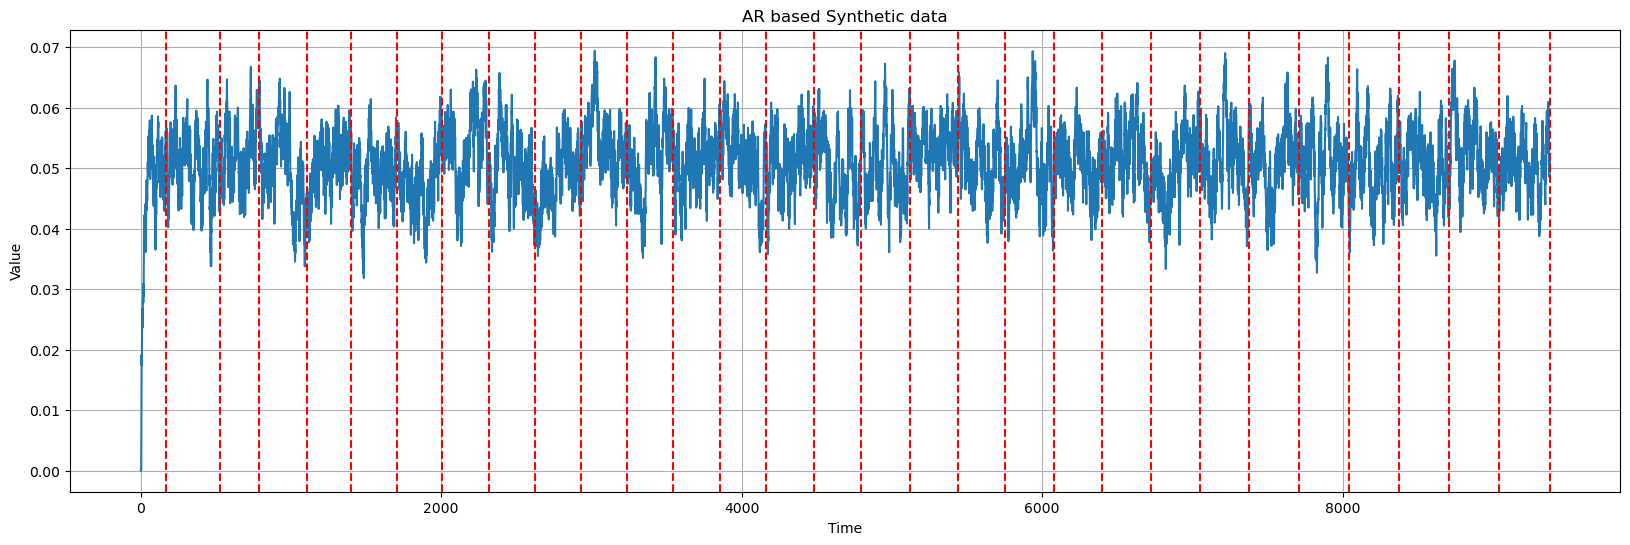

In [48]:
# Plot the generated time series data
plt.figure(figsize=(20, 6))
plt.plot(arima_data)

last_change_point = 0
for change_point_distance in change_point_distances:
    last_change_point = change_point_distance + last_change_point
    plt.axvline(last_change_point, c='r', linestyle='--')

plt.title(f'AR based Synthetic data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()